## Program nr 1.3  
**Barbara Pobiedzińska, Agata Semerjak, Maciej Wieloch**  
Piątek 15:00

Dla macierzy o rozmiarze mniejszym lub równym 2<sup>l</sup> × 2<sup>l</sup> algorytm rekurencyjny Binéta. Dla macierzy o rozmiarze większym od 2<sup>l</sup> × 2<sup>l</sup> algorytm rekurencyjny Strassena. Program rezlizowany w języku *Python*.

In [1]:
# import bibliotek
import time
import numpy as np
import json
import matplotlib.pyplot as plt

Funkcje pomocnicze

In [2]:
def split(matrix):
    """Funkcja pomocnicza służąca do dzielenia
    macierzy na 4 równe części."""
    global strassen_operation_counter

    n = len(matrix)
    m = n // 2
    a = [[0 for j in range(m)] for i in range(m)]
    b = [[0 for j in range(m)] for i in range(m)]
    c = [[0 for j in range(m)] for i in range(m)]
    d = [[0 for j in range(m)] for i in range(m)]
    for i in range(m):
        for j in range(m):
            a[i][j] = matrix[i][j]
            b[i][j] = matrix[i][j + m]
            c[i][j] = matrix[i + m][j]
            d[i][j] = matrix[i + m][j + m]
    return a, b, c, d


def add(matrix1, matrix2):
    """Funkcja pomocnicza do dodawania macierzy dla algorytmu strassena"""
    global strassen_operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] + matrix2[i][j]
            strassen_operation_counter += 1
    return result


def sub(matrix1, matrix2):
    """Funkcja pomocnicza do odejmowania macierzy dla algorytmu strassena"""
    global strassen_operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] - matrix2[i][j]
            strassen_operation_counter += 1
    return result


def combine(c11, c12, c21, c22):
    """Funkcja pomocnicza do łączenia macierzy wynikowych"""
    if type(c11) == int:
        return [[c11,c12],[c21,c22]]
    n = len(c11)
    m = 2 * n
    result = [[0 for j in range(m)] for i in range(m)]
    for i in range(n):
        for j in range(n):
            result[i][j] = c11[i][j]
            result[i][j + n] = c12[i][j]
            result[i + n][j] = c21[i][j]
            result[i + n][j + n] = c22[i][j]
    return result


def add_binet(matrix1, matrix2):
    """Funkcja pomocnicza do dodawania macierzy dla algorytmu Bineta"""
    global binet_operation_counter

    n = len(matrix1)
    result = [[0 for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            result[i][j] = matrix1[i][j] + matrix2[i][j]
            binet_operation_counter += 1
    return result

Algorytm Bineta

In [3]:
def binet(A, B):
  """Funkcja realizująca algorytm Bineta"""
  global binet_operation_counter
  
  n = len(A) 
  
  # Jeżeli rozmiar macierzy jest 1x1 zwróć jej iloczyn
  if n == 1:
    binet_operation_counter += 1

    return [[A[0][0]*B[0][0]]]

  # Dzielenie macierzy na 4 równe części
  a11, a12, a21, a22 = split(A)
  b11, b12, b21, b22 = split(B)

  # Obliczenie macierzy wynikowej
  c11 = add_binet(binet(a11, b11), binet(a12, b21))
  c12 = add_binet(binet(a11, b12), binet(a12, b22))
  c21 = add_binet(binet(a21, b11), binet(a22, b21))
  c22 = add_binet(binet(a21, b12), binet(a22, b22))
  
  # Łączenie macierzy wynikowych
  result = combine(c11, c12, c21, c22)

  return result

Algorytm Strassena

In [4]:
def strassen(matrix1, matrix2):
    """Funkcja realizująca algorytm Strassena"""
    global strassen_operation_counter

    n = len(matrix1)

    # Sprawdzenie rozmiaru macierzy
    # jeśli macierz jest 1x1 to zwróć jej iloczyn
    if n == 1:
        strassen_operation_counter += 1
        return [[matrix1[0][0] * matrix2[0][0]]]

    # Dzielenie macierzy na 4 równe części
    a11, a12, a21, a22 = split(matrix1)
    b11, b12, b21, b22 = split(matrix2)

    # Obliczenie 7 macierzy pomocniczych
    m1 = strassen(add(a11, a22), add(b11, b22))
    m2 = strassen(add(a21, a22), b11)
    m3 = strassen(a11, sub(b12, b22))
    m4 = strassen(a22, sub(b21, b11))
    m5 = strassen(add(a11, a12), b22)
    m6 = strassen(sub(a21, a11), add(b11, b12))
    m7 = strassen(sub(a12, a22), add(b21, b22))

    # Obliczenie macierzy wynikowej
    c11 = add(sub(add(m1, m4), m5), m7)
    c12 = add(m3, m5)
    c21 = add(m2, m4)
    c22 = add(sub(add(m1, m3), m2), m6)

    # Łączenie macierzy wynikowych
    result = combine(c11, c12, c21, c22)

    return result

Weryfikacja poprawności

In [76]:
# generacja macierzy 32x32 o losowych wartościach
m1 = np.random.rand(2**5, 2**5)
m2 = np.random.rand(2**5, 2**5)

# obliczenie wyniku mnożenia macierzy trzema sposobami:
# Algorytmem Strassena, Bineta oraz wbudowaną funkcją biblioteki numpy
result_strassen = strassen(m1, m2)
result_binet = binet(m1, m2)
result_numpy = np.dot(m1, m2)

print("Czy algorytm Bineta działa prawidłowo?", end=" ")
print((np.array(result_binet).round(2) == result_numpy.round(2)).all())
print("Czy algorytm Strassena działa prawidłowo?", end=" ")
print((np.array(result_strassen).round(2) == result_numpy.round(2)).all())

Czy algorytm Bineta działa prawidłowo? True
Czy algorytm Strassena działa prawidłowo? True


### Pseudokod programu  
`dla l -> [4, 7, 9] wykonaj:`   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`dla k -> [2; 12] wykonaj:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`macierz1 = losowa macierz o wymiarze 2^k x 2^k`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`macierz2 = losowa macierz o wymiarze 2^k x 2^k`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`jeśli k <= l, to:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`licznik operacji zmiennoprzecinkowych = 0`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`rozpocznij pomiar czasu`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`wykonaj algorytm Bineta`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zakończ pomiar czasu`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zapisz liczbę wykonanych operacji zmiennoprzecinkowych`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`w przeciwnym razie:`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`licznik operacji zmiennoprzecinkowych = 0`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`rozpocznij pomiar czasu`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`wykonaj algorytm Strassena`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zakończ pomiar czasu`  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zapisz liczbę wykonanych operacji zmiennoprzecinkowych`    
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zapisz pomiar czasu`  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`zapisz dane z iteracji`  

In [ ]:
data_dict = {}

# iteracje algorytmu dla różnych wartości granicy zmiany algorytmu
for l in [4, 7, 9]:
      times = []
      operations = []

      # dla różnych rozmiarów macierzy
      for k in range(2, 12): 
            # generacja macierzy rozmiaru 2^k x 2^k
            # wypełnionych losowymi wartościami
            m1 = np.random.rand(2**k, 2**k)
            m2 = np.random.rand(2**k, 2**k)

            if k <= l: # granica zmiany algorytmu
                  binet_operation_counter = 0
                  
                  # pomiar czasu
                  start = time.time()
                  binet(m1, m2)
                  stop = time.time()

                  operations.append(binet_operation_counter)

            else:
                  strassen_operation_counter = 0

                  start = time.time()
                  strassen(m1, m2)
                  stop = time.time()

                  operations.append(strassen_operation_counter)

            times.append(stop - start)
      # zapis czasów obliczeń oraz liczby operacji
      # zmiennoprzecinkowych dla każdej iteracji
      data_dict[l] = {"times": times, "operations": operations}

In [12]:
# zapisanie rezultatów eksperymentów do pliku
# (z uwagi na długi czas obliczeń)
with open('json_data.json', 'w') as outfile:
    json.dump(data_dict, outfile)

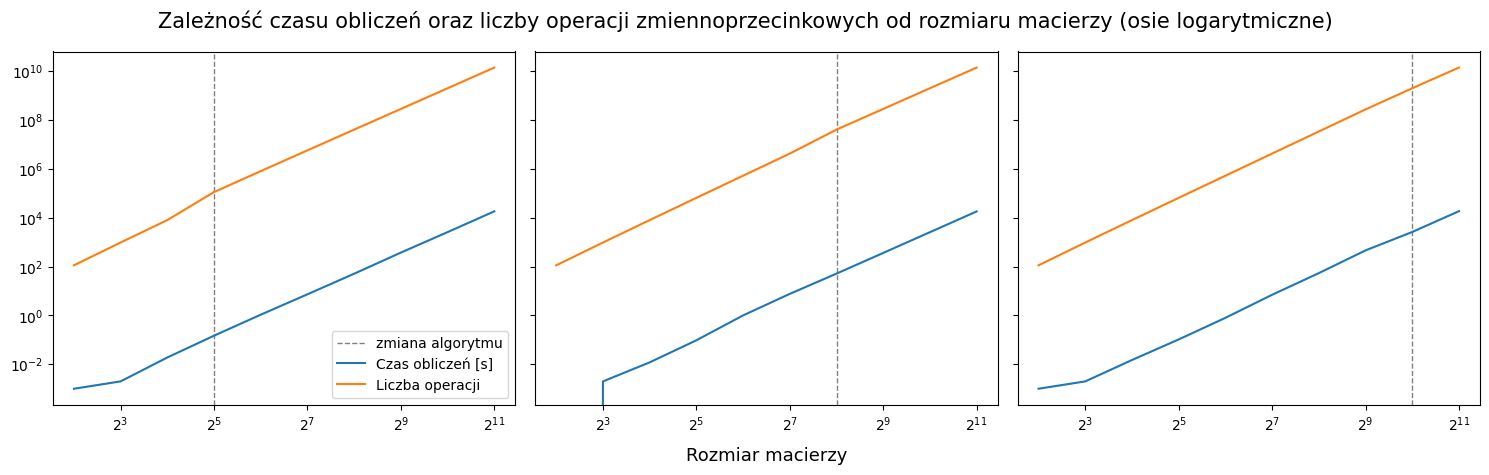

In [63]:
k = range(2, 12)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(15)
fig.set_tight_layout(tight='rect')
fig.suptitle("Zależność czasu obliczeń oraz liczby operacji zmiennoprzecinkowych od rozmiaru macierzy (osie logarytmiczne)", fontsize=15)

for key, value, ax in zip(data_dict.keys(), data_dict.values(), [ax1, ax2, ax3]):
    ax.axvline(x=2**(key+1), color='grey', label='zmiana algorytmu', linestyle="--", linewidth=1)
    ax.plot(np.power(2, k), value["times"], label="Czas obliczeń [s]")
    ax.plot(np.power(2, k), value["operations"], label="Liczba operacji")
    ax.semilogx(base=2)
    ax.set_yscale("log")

    if ax == ax1:
        ax.legend()
    elif ax == ax2:
        ax.set_xlabel("Rozmiar macierzy", labelpad=10, fontsize=13)

plt.show()

Wraz z wykładniczym (o podstawie 2) przyrostem rozmiaru macierzy, zarówno czas obliczeń, jak i liczba operacji wzrasta również wykładniczo (o podstawie 10). Dla l=5 możemy zaobserwować delikatną redukcję kąta nachylenia prostej (prędkości przyrostu czasu i liczby operacji). Dla l = 8 i l = 10 prosta wydaje się jednolita.

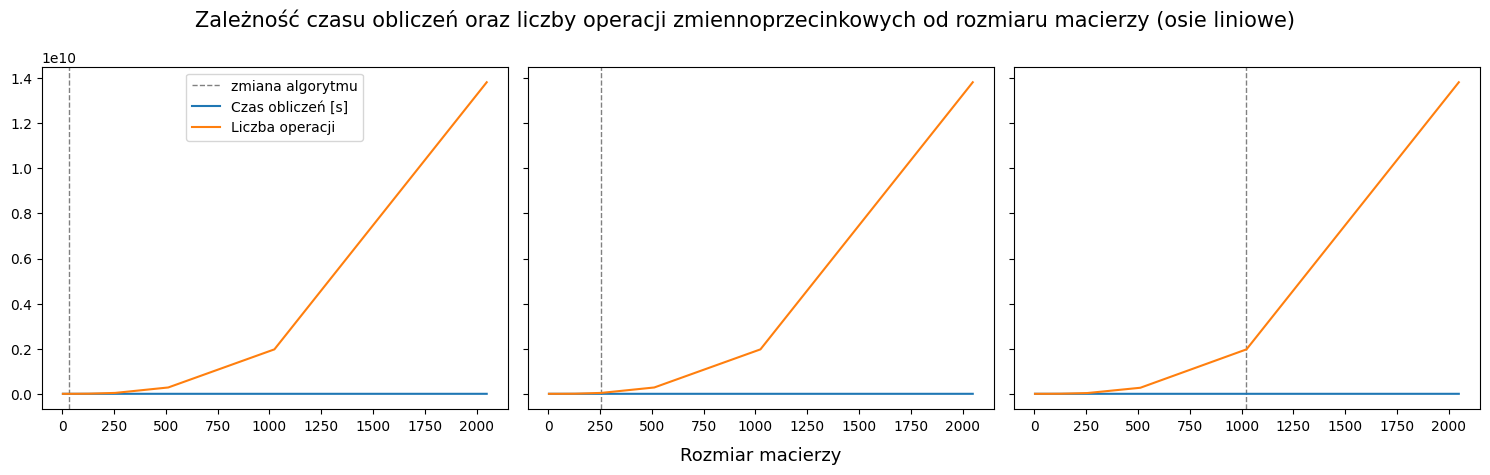

In [64]:
k = range(2, 12)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(15)
fig.set_tight_layout(tight='rect')
fig.suptitle("Zależność czasu obliczeń oraz liczby operacji zmiennoprzecinkowych od rozmiaru macierzy (osie liniowe)", fontsize=15)

for key, value, ax in zip(data_dict.keys(), data_dict.values(), [ax1, ax2, ax3]):
    ax.axvline(x=2**(key+1), color='grey', label='zmiana algorytmu', linestyle="--", linewidth=1)
    ax.plot(np.power(2, k), value["times"], label="Czas obliczeń [s]")
    ax.plot(np.power(2, k), value["operations"], label="Liczba operacji")

    if ax == ax1:
        ax.legend()
    elif ax == ax2:
        ax.set_xlabel("Rozmiar macierzy", labelpad=10, fontsize=13)

plt.show()